# Nintendo Tweets Exploratory Data Analysis

We now have a collection of tweets that are related to each of the games we will be analyzing: Super Smash Bros Ultimate, Fire Emblem: Three Houses, Super Mario Party, and Pokemon Let's Go. 

In [1]:
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import nltk.sentiment.vader as vd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS 
from IPython.display import Image

In [2]:
path = "/Users/jasonzhou/Documents/GitHub/NintendoTweets/Documents/Capstone3"
os.chdir(path)

smashdata = pd.read_csv('smashdata.csv')
firedata = pd.read_csv('firedata.csv')
partydata = pd.read_csv('partydata.csv')

In [3]:
# Checking to see if data sets were read in as intended
firedata

Unnamed: 0                           cleanedtext    standardized
0          12281                           many house   ['fireemblem']
1          12291                                   oh   ['fireemblem']
2          12920  holy crap new game look really good   ['fireemblem']
3          12991                        oh fuck going   ['fireemblem']
4          13244           oh shit switch fire emblem   ['fireemblem']
...          ...                                   ...             ...
1558      104217             three house march spring   ['fireemblem']
1559      104315             three house march spring   ['fireemblem']
1560      104359             three house march spring   ['fireemblem']
1561      104447                   three house spring   ['fireemblem']
1562      104475             three house march spring   ['fireemblem']

[1563 rows x 3 columns]

As a recap, E3, short for Electronic Entertainment Expo, is the biggest annual event in the video gaming industry. Companies in the industry attend the event to present their upcoming video game and electronics releases. Nintendo is one of the giants of the video gaming industry and has a large customer base. Let's first recall about how many tweets of each game we're working with here. To get a more specific idea, we'll also look at how many unique tweets we have compared to the total amount.

When people retweet someone else's tweet, it shows up as a separate tweet in the data. Retweeting is when I take someone else's tweet and post it myself, referencing the original tweeter of course. If one person tweets "abc" and I retweet this tweet, our tweets will show up as two tweets in the data set. In this situation, there are two total tweets but only one unique tweet. So when I look at total tweets vs. unique tweets, I am essentially getting an idea of how many of the total tweets are just retweets.

In [4]:
print("Amount of Total/Unique Tweets Per Game")
print(" ")
print("Super Smash Bros. Ultimate: ", len(smashdata), "/", len(set(smashdata['cleanedtext'])))
print("Fire Emblem: Three Houses: ", len(firedata), "/", len(set(firedata['cleanedtext'])))
print("Super Mario Party: ", len(partydata), "/", len(set(partydata['cleanedtext'])))

Amount of Total/Unique Tweets Per Game
 
Super Smash Bros. Ultimate:  12535 / 3016
Fire Emblem: Three Houses:  1563 / 200
Super Mario Party:  882 / 264


To gain a better understanding of each of our datasets, we will use word clouds to get a visual summary of the collection of tweets. Let's start with the by far most talked about game, Smash Ultimate. 

In [5]:
# Helper function to get relevant text from data set. Not sure why you can't just directly store strings into columns,
# always automatically converts to a generic object type

def getTweet(string):
    string = string.split(maxsplit=1)[1]
    string = string.split("\nName:")[0]
    return string

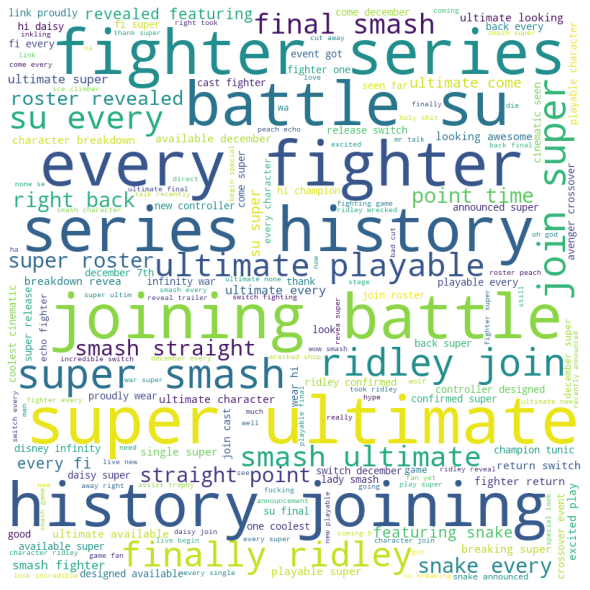

In [6]:
# Generating word cloud for Smash Bros tweets

comment_words = ""
stopwords = set(STOPWORDS)

# iterate through every tweet
for i in range(len(smashdata)): 
      
    # typecaste each val to string 
    tweet = getTweet(str(smashdata.iloc[[i]]['cleanedtext']))
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

For those unfamiliar with the the Smash Bros. games, they are fighting games with characters from all different kinds of Nintendo franchises. The most represented franchises are ones such as Mario, Fire Emblem, Zelda, and Pokemon. 

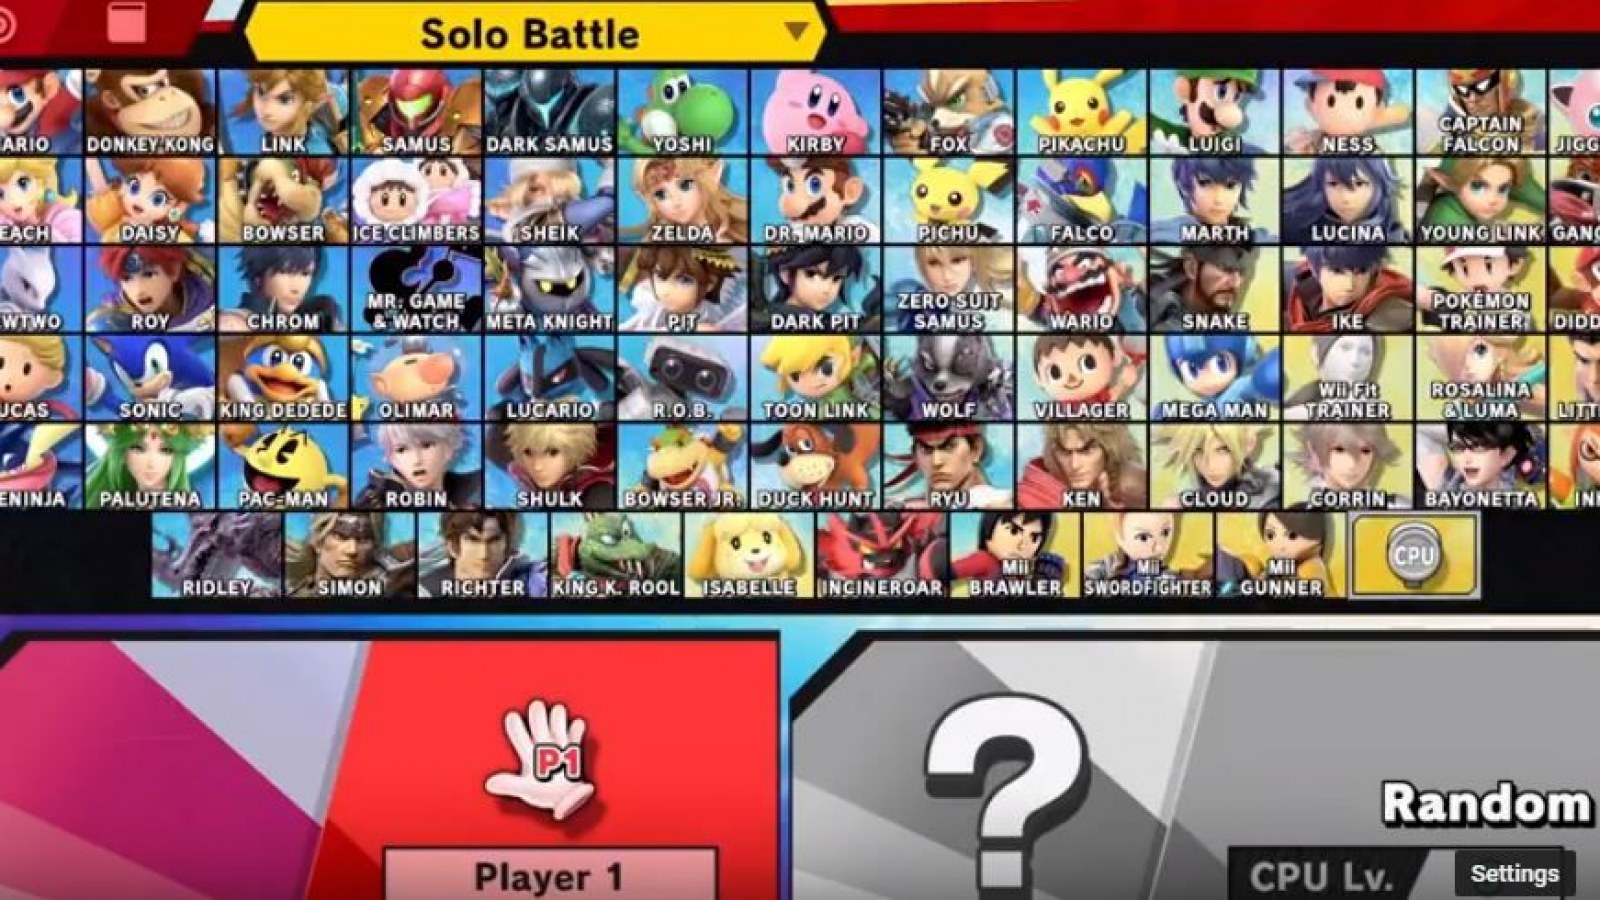

In [7]:
Image(filename = "smashroster.jpg", width = 600, height = 300)

It appears that people are excited about new characters joining the Smash Ultimate roster. Apart from this, we see many positive words like 'brilliant', 'good', 'incredible', 'ambitious'. Based off the word cloud alone, we get the impression that the majority of people on twitter are responding positively to the announcement of this game.

Let's now look for a breakdown of how many tweets were retweeted.

In [36]:
smashdict = {}

for i in range(len(smashdata)):
    item = getTweet(str(smashdata.iloc[[i]]['cleanedtext']))
    if item in smashdict.keys():
        smashdict[item] = smashdict[item] + 1
    else:
        smashdict[item] = 1
        
smashdictsorted = {k: v for k, v in sorted(smashdict.items(), key=lambda item: item[1], reverse=True)}
list(smashdictsorted.items())[:15]

[('every fighter series history joining battle su...', 2523),
 ('super ultimate ', 981),
 ('he finally ridley join super ultimate playable...', 732),
 ('final smash straight point time get right back...', 523),
 ('super roster revealed featuring snake every fi...', 509),
 ('super ultimate come ', 366),
 ('super smash ultimate character breakdown revea...', 227),
 ('super ultimate looking awesome who excited play ', 199),
 ('is single super smash fighter return switch ', 195),
 ('breaking super smash ultimate available december ', 191),
 ('thank ', 142),
 ('new controller designed available super ultimate ', 139),
 ('super release switch december ', 122),
 ('ridley confirmed super ultimate ', 117),
 ('hi daisy super ultimate ', 112)]

After doing a quick skimming of these tweets, the ones with the most retweets are mostly official announcements regarding the game rather than opinionated, personal tweets. The most frequently retweeted tweet at 2523 times is shown below:

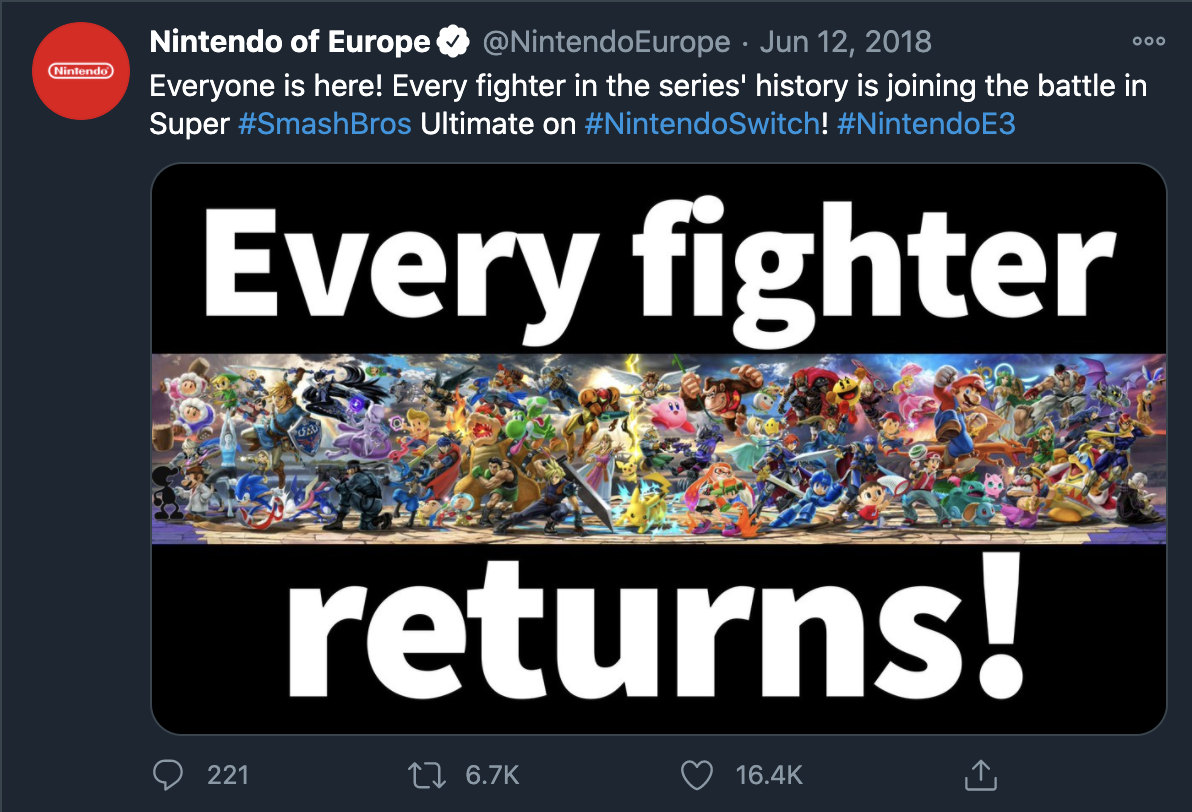

In [9]:
Image(filename = "smashtweet.png", width = 600, height = 300)

Going back to our word cloud, it is clear that the biggest and most frequent words are simply words that appear in the official announcements most frequently, such as "smash", "ultimate", "fighter" and "super". Retweeting official announcements can be considered positive sentiment to some degree, as it indicates that the twitter user is excited enough about the news to want to share and spread it. However we do also want to see more unique opinions on the announcement of the game, and so we'll again create a word cloud which only looks at unique tweets, so that the retweets do not crowd them out. 

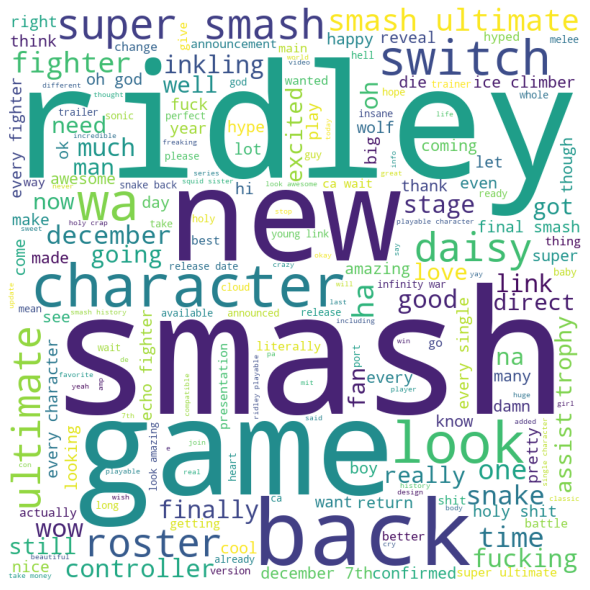

In [10]:
uniquesmash = set(smashdata['cleanedtext'])

# Generating word cloud for unique Smash Bros tweets

comment_words = ""

# iterate through every unique tweet
for tweet in uniquesmash: 
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Not much has changed it appears. Most words here are positive or imply positive reaction like "oh god" or "holy shit". Daisy and Ridley are new fighters to the roster, and they are evidently talked about quite frequently. Just based off a look at this word cloud, it suggests that the large majority are excited for Smash Ultimate to come out.

Let's now look at Fire Emblem: Three Houses.

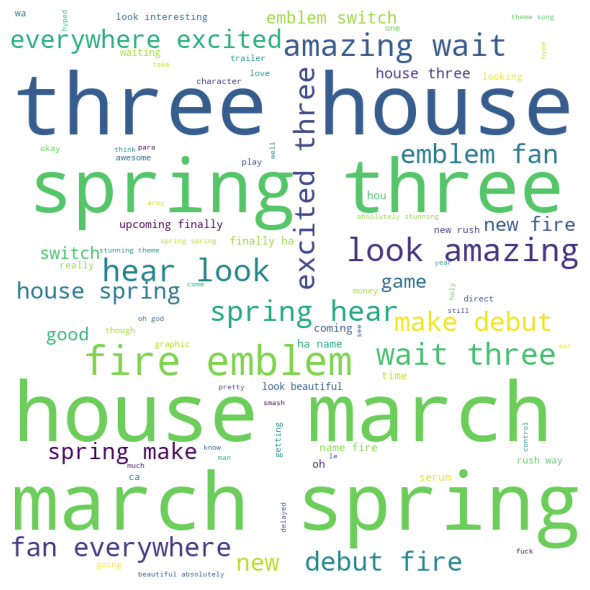

In [11]:
comment_words = ""

# iterate through every tweet
for i in range(len(firedata)): 
      
    # typecaste each val to string 
    tweet = getTweet(str(firedata.iloc[[i]]['cleanedtext']))
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This word cloud looks far more sparse. This makes sense given that the amount of unique tweets make up only a small fraction of the total tweets. Even then, we can see many positive words such as "amazing", "excited", "stunning", "interesting", "gorgeous". Let's get a quick summary of how many retweets we have here:

In [35]:
firedict = {}

for i in range(len(firedata)):
    item = getTweet(str(firedata.iloc[[i]]['cleanedtext']))
    if item in firedict.keys():
        firedict[item] = firedict[item] + 1
    else:
        firedict[item] = 1
        
firedictsorted = {k: v for k, v in sorted(firedict.items(), key=lambda item: item[1], reverse=True)}
list(firedictsorted.items())[:15]

[('three house march spring ', 1182),
 ('hear look amazing wait ', 54),
 ('make debut fire emblem fan everywhere excited ...', 37),
 ('three house spring ', 31),
 ('three house ', 17),
 ('new fire emblem switch so excited ', 16),
 ('upcoming finally ha name fire emblem three hou...', 7),
 ('three house serum ', 6),
 ('new rush way ', 5),
 ('look interesting ', 4),
 ('look beautiful absolutely stunning theme song ...', 3),
 ('game waiting finally ', 3),
 ('oh ', 2),
 ('it looking ', 2),
 ('digging music switch ', 2)]

Out of the total 1565 tweets we have related to the new Fire Emblem game, 1182 are simply retweets of the official Twitter announcement of its release, as depicted below:

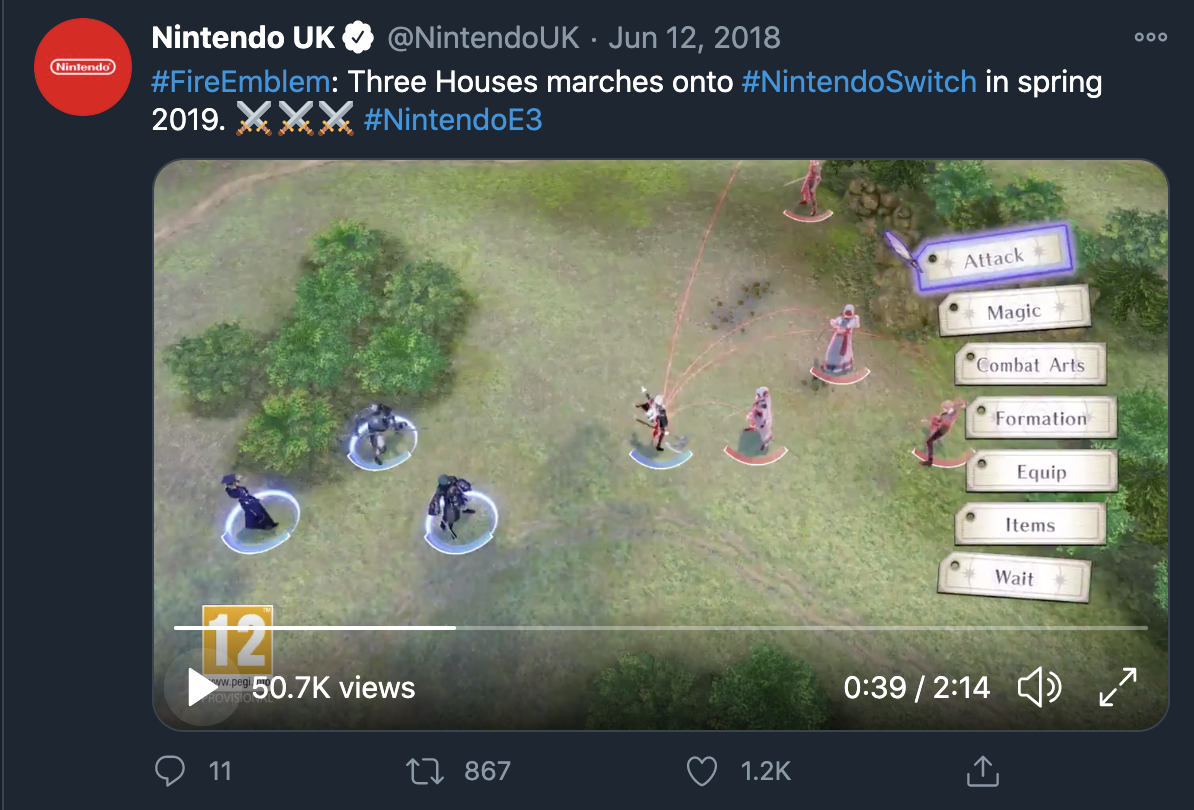

In [13]:
Image(filename = "firetweet.png", width = 600, height = 300)

Like we did with Smash Bros, let's instead get a word cloud of unique tweets so that the retweets aren't so dominant in representation.

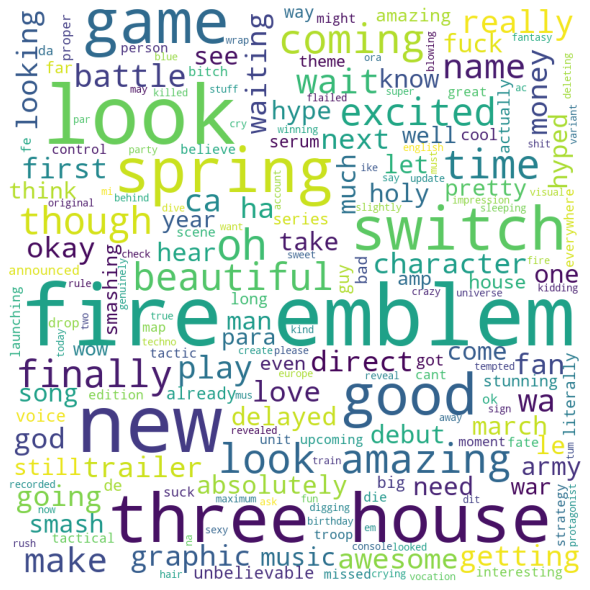

In [14]:
uniquefire = set(firedata['cleanedtext'])

# Generating word cloud for unique Fire Emblem tweets

comment_words = ""

# iterate through every unique tweet
for tweet in uniquefire: 
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This word cloud is far more telling than the original one. At an initial glance we see many postive words like "amazing", "love", "good", "beautiful", "awesome", "hyped", "excited". Many of these words are quite big too, which suggests that more people share these sentiments. Although not nearly as popular as Smash Bros, it looks like we have overall very postive reaction to the announcement of this game. 

Let's now move on to Super Mario Party. This time we'll just directly construct a word cloud based on original tweets.

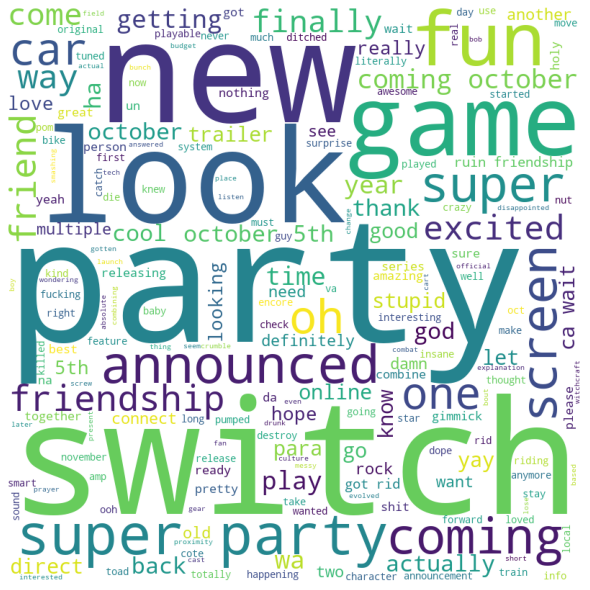

In [15]:
uniqueparty = set(partydata['cleanedtext'])

# Generating word cloud for unique Mario Party tweets

comment_words = ""

# iterate through every unique tweet
for tweet in uniqueparty: 
  
    # split the value 
    tokens = tweet.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Ignoring the words that are most likely just part of retweeted announcements like "switch", "party", "super", let's look for words that convey opinionated meaning. 

Unlike Smash Bros and Fire Emblem, opinions on this game seem more divided. While we do have positive words such as "excited", "good", "amazing", "pumped", they aren't particularly big. On the negative side of things, we're seeing words such as "ruin", "gimmick", "shit", "ditched". We're also seeing phrases that suggest negative reaction like "another really", and "got rid". Although we don't know for sure what context these words and phrases are being used in, we can potentially expect more negative sentiments towards this game than towards Smash Bros and Fire Emblem.

In [34]:
partydict = {}

for i in range(len(partydata)):
    item = getTweet(str(partydata.iloc[[i]]['cleanedtext']))
    if item in partydict.keys():
        partydict[item] = partydict[item] + 1
    else:
        partydict[item] = 1
        
partydictsorted = {k: v for k, v in sorted(partydict.items(), key=lambda item: item[1], reverse=True)}
list(partydictsorted.items())[:15]

[('who like rock party super coming ', 215),
 ('get party started super come ', 154),
 ('who like rock party super coming october 5th ', 106),
 ('die party super ', 40),
 ('friend become enemy coming october switch ', 27),
 ('look amazing ', 26),
 ('super ', 8),
 ('getting releasing 5th october have look ', 8),
 ('absolute witchcraft listen explanation ', 7),
 ('super party switch ', 4),
 ('super party is party keep losing track either ...', 3),
 ('announced coming october switch stay tuned loc...', 3),
 ('know switch need copy game ', 3),
 ('come october check trailer ', 3),
 ('party getting new iteration switch titled supe...', 3)]

# Feature Extraction and Analysis

We'll start with count and TF-IDF vectors of our collection of Smash Bros tweets. From our analysis of word counts and relative frequencies, we can begin to see which tokens have frequencies which may be highly correlated with other token frequencies.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def makeCountVec(df):
    vectorizer = CountVectorizer(min_df=0)
    vectorizer.fit(df['cleanedtext'])
    array = vectorizer.transform(df['cleanedtext'])
    array = array.toarray()
    features = vectorizer.get_feature_names()
    return pd.DataFrame(data=array, index=df['Unnamed: 0'], columns=features)

def makeTfIdfVec(df):
    vectorizer = TfidfVectorizer(min_df=0)
    vectorizer.fit(df['cleanedtext'])
    array = vectorizer.transform(df['cleanedtext'])
    array = array.toarray()
    features = vectorizer.get_feature_names()
    return pd.DataFrame(data=array, index=df['Unnamed: 0'], columns=features)

In [18]:
# Creating word vectors and their corresponding correlation matrices
smashcounts = makeCountVec(smashdata)
smashTFIDF = makeTfIdfVec(smashdata)

smashcountscorr = smashcounts.corr()
smashTFIDFcorr = smashTFIDF.corr()

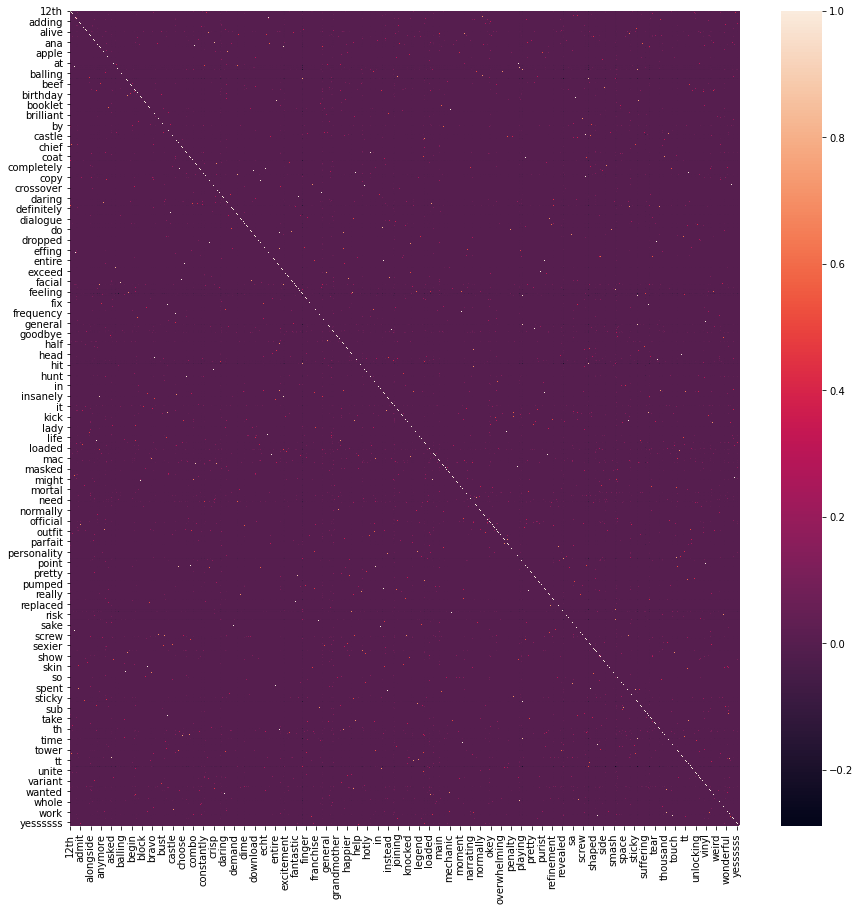

In [19]:
# Get visualization of correlation matrix of smashcounts

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(smashcountscorr)

This looks about expected, most token frequencies have nothing to do with each other, but we still see some red and white specks which represent somewhat correlated token vectors, with some white specks that represent highly correlated token vectors. Let's get a look into what these are.

In [20]:
# Defining a helper function that identifies feature correlations above a certain threshold, in this case 0.8

def findHighCorr(df):
    thresh = 0.8

    df_corr = df.corr().abs().unstack()

    df_corr_filt = df_corr[(df_corr>thresh) | (df_corr<-thresh)].reset_index()

    # deduplicate
    corrs = df_corr_filt.iloc[df_corr_filt[['level_0','level_1']].apply(lambda r: ''.join(map(str, sorted(r))), axis = 1).drop_duplicates().index]
    return corrs[corrs['level_0'] != corrs['level_1']]

In [21]:
sm1 = findHighCorr(smashcounts)
sm1

level_0      level_1         0
11     absolutely  improvement  0.841919
12     absolutely         park  0.891690
16       accepted    challenge  1.000000
18    accordingly        avoid  1.000000
19    accordingly      scalper  1.000000
...           ...          ...       ...
2503      through        tweet  0.816464
2505        throw      working  0.816464
2538         took      wrecked  0.958161
2587        tunic         wear  0.990304
2624    unlocking   yessssssss  1.000000

[420 rows x 3 columns]

Curiously enough we have some tokens that have a correlation of 1 with other tokens. This could be because some tokens only show up once, and they coincidentally happen to be with other single occurences of tokens too. We'll keep this in mind when we perform feature analysis during modeling phase. 

Let's now look at the TFIDF vector of our Smash Bros words.

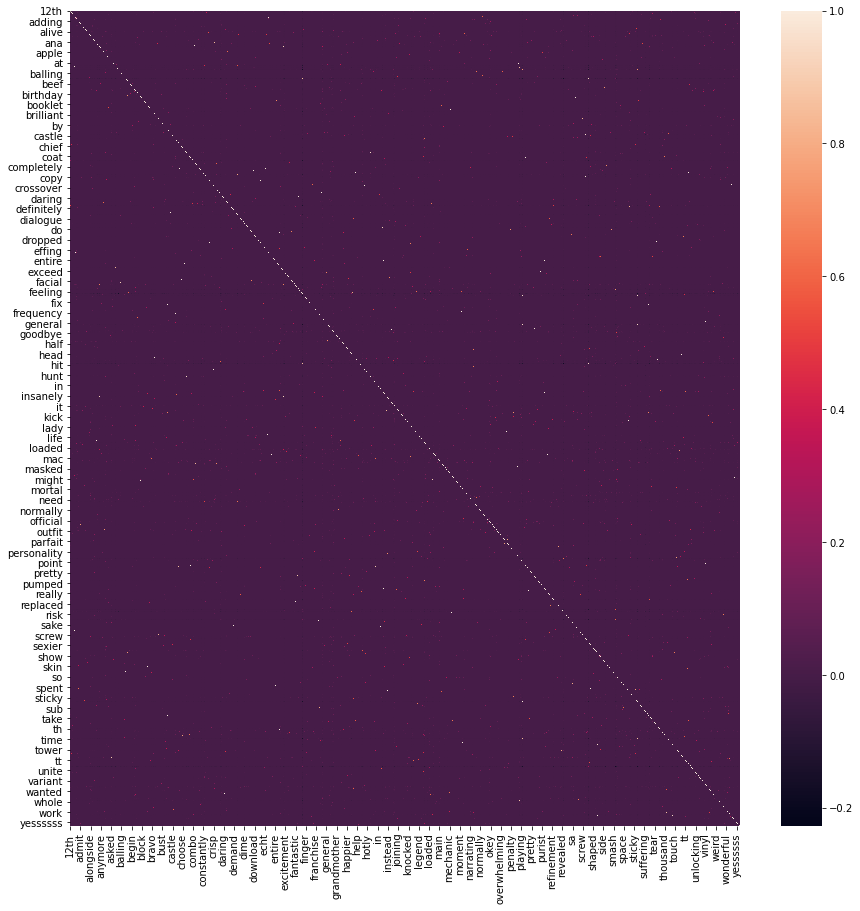

In [22]:
# Get visualization of correlation matrix of smash TFIDF scores

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(smashTFIDFcorr)

In [23]:
sm2 = findHighCorr(smashTFIDF)
sm2

level_0      level_1         0
11     absolutely  improvement  0.800902
12     absolutely         park  0.852788
16       accepted    challenge  1.000000
18    accordingly        avoid  1.000000
19    accordingly      scalper  1.000000
...           ...          ...       ...
2491        threw       window  1.000000
2495        throw      working  0.869671
2528         took      wrecked  0.955200
2577        tunic         wear  0.981524
2613    unlocking   yessssssss  1.000000

[414 rows x 3 columns]

We see roughly the same amount of results, with even what appears to be the same results from the limited output from each vector. Let's find out exactly overlapping results there are.

In [41]:
# Find overlap
sm1.merge(sm2)

level_0     level_1    0
0       accepted   challenge  1.0
1    accordingly       avoid  1.0
2    accordingly     scalper  1.0
3        account        bank  1.0
4       accuracy  historical  1.0
..           ...         ...  ...
257    somewhere   vibrating  1.0
258       sticky      thread  1.0
259        stood        vast  1.0
260        threw      window  1.0
261    unlocking  yessssssss  1.0

[262 rows x 3 columns]

Both types of vectorizers produce around the same amount of results, with 262 overlapping results.

Moving on to Fire Emblem:

In [24]:
# Creating word vectors and their corresponding correlation matrices

firecounts = makeCountVec(firedata)
fireTFIDF = makeTfIdfVec(firedata)

firecountscorr = firecounts.corr()
fireTFIDFcorr = fireTFIDF.corr()

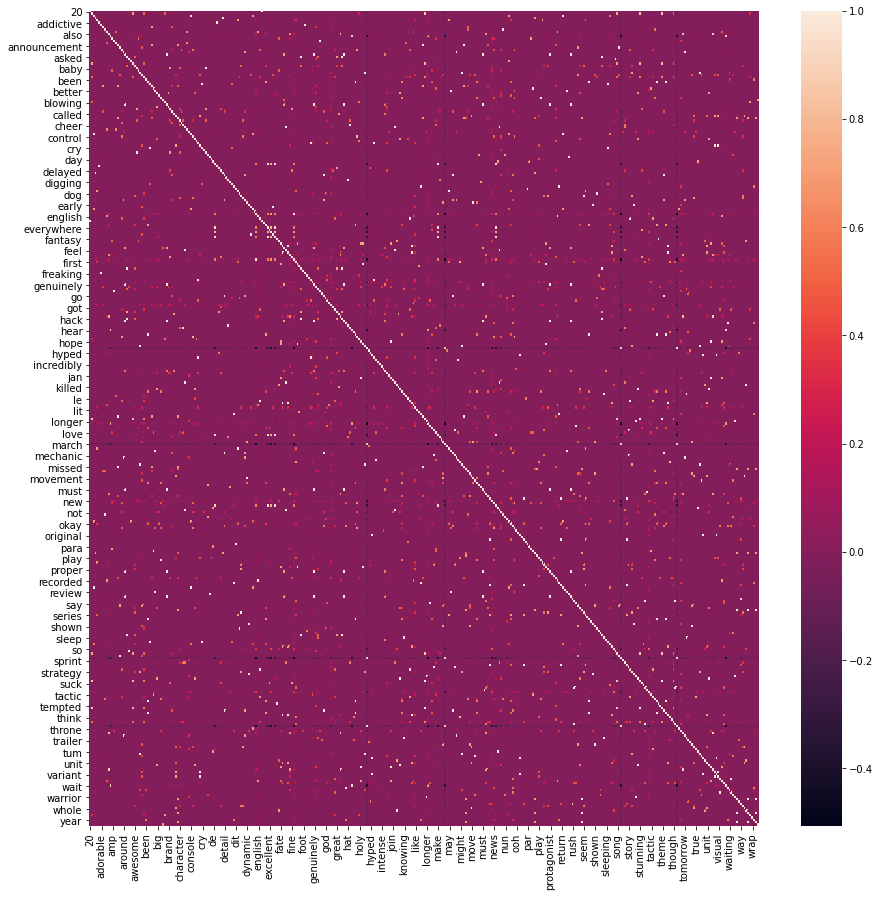

In [25]:
# Get visualization of correlation matrix of firecounts

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(firecountscorr)

We can clearly see many white, orange, and red specks that represent varying degrees of significant correlation. It's easier to identify them here compared to Smash Bro's since there are far fewer tweets here.

In [43]:
fi1 = findHighCorr(firecounts)
fi1

level_0   level_1         0
1            20        eu  1.000000
3    absolutely      long  0.865748
4    absolutely  stunning  0.865748
5    absolutely     theme  0.865748
7            ac   console  1.000000
..          ...       ...       ...
716      update    visual  1.000000
725    vocation      want  1.000000
742       watch      work  1.000000
743       watch      yell  1.000000
755        work      yell  1.000000

[203 rows x 3 columns]

We have 200 results here.

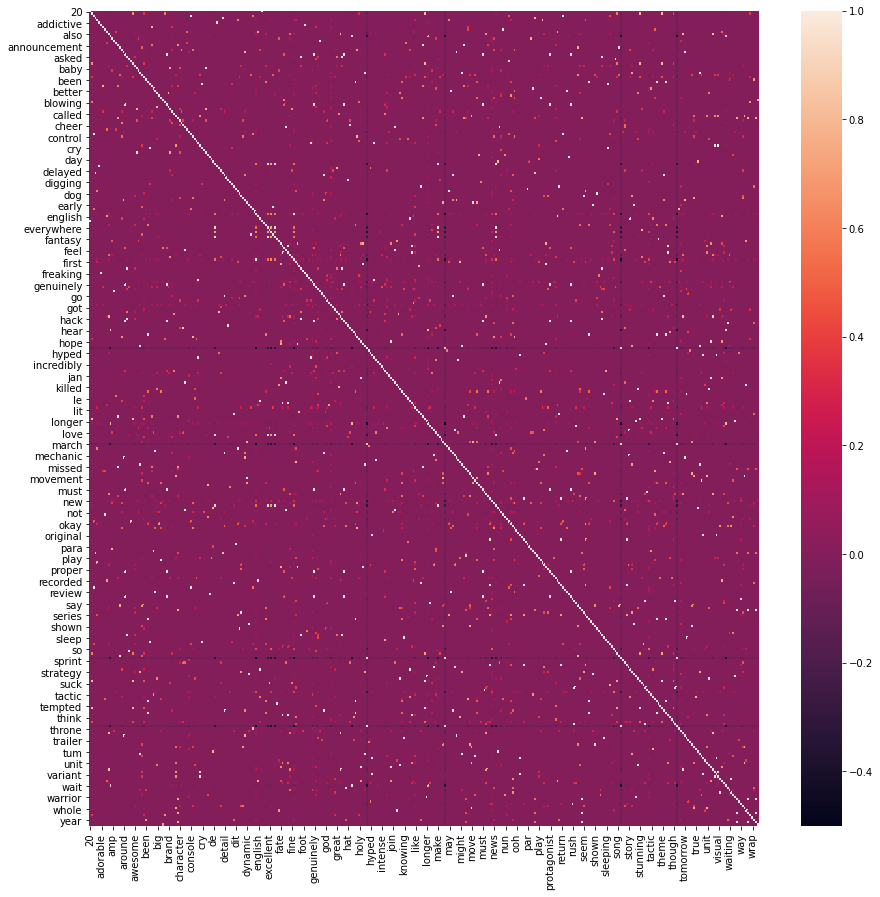

In [27]:
# Get visualization of correlation matrix of smashcounts

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(fireTFIDFcorr)

In [44]:
fi2 = findHighCorr(fireTFIDF)
fi2

level_0   level_1         0
1            20        eu  1.000000
3    absolutely      long  0.807998
4    absolutely  stunning  0.807998
5    absolutely     theme  0.807998
7            ac   console  1.000000
..          ...       ...       ...
714      update    visual  1.000000
723    vocation      want  1.000000
740       watch      work  1.000000
741       watch      yell  1.000000
753        work      yell  1.000000

[202 rows x 3 columns]

In [45]:
# Determining overlap

fi1.merge(fi2)

level_0   level_1    0
0           20        eu  1.0
1           ac   console  1.0
2           ac    reveal  1.0
3      account  deleting  1.0
4    addictive      deep  1.0
..         ...       ...  ...
160     update    visual  1.0
161   vocation      want  1.0
162      watch      work  1.0
163      watch      yell  1.0
164       work      yell  1.0

[165 rows x 3 columns]

Almost the same amount of results as the count vector, with 165 overlapping results.

Moving on to Mario Party:

In [29]:
# Creating word vectors and their corresponding correlation matrices
partycounts = makeCountVec(partydata)
partyTFIDF = makeTfIdfVec(partydata)

partycountscorr = partycounts.corr()
partyTFIDFcorr = partyTFIDF.corr()

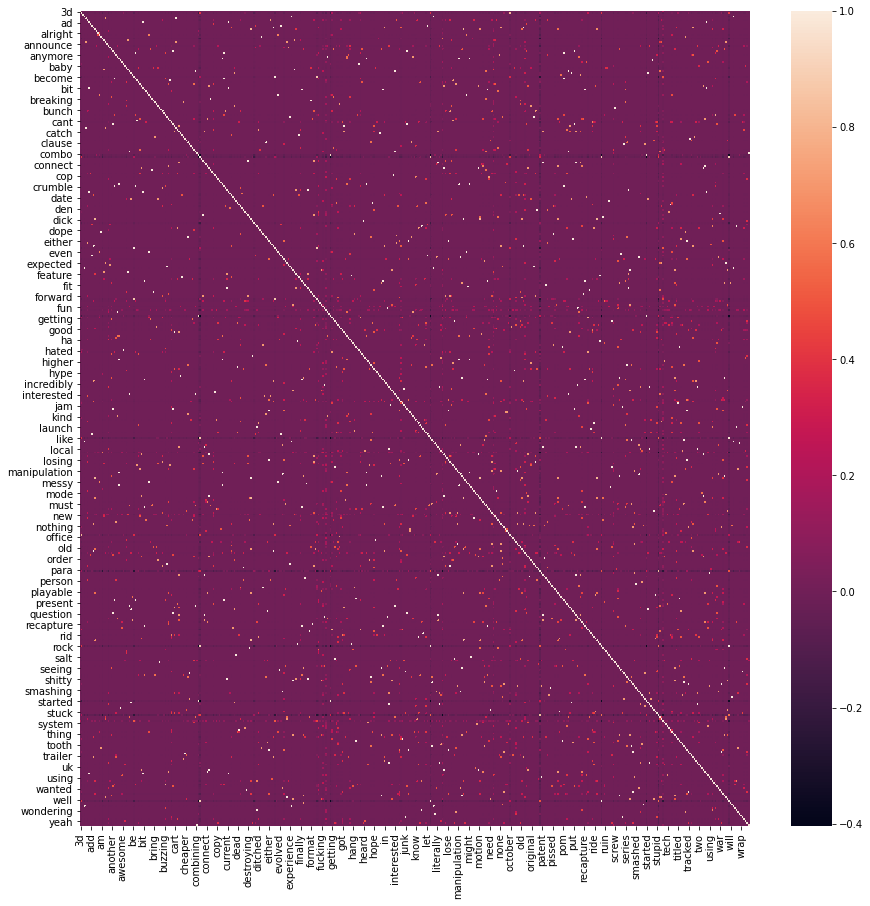

In [30]:
# Get visualization of correlation matrix of partycounts

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(partycountscorr)

In [46]:
pa1 = findHighCorr(partycounts)
pa1

level_0      level_1         0
2         5th      october  0.815925
5    absolute  explanation  1.000000
6    absolute       listen  1.000000
7    absolute   witchcraft  1.000000
9      actual         cast  1.000000
..        ...          ...       ...
708      side      tracked  1.000000
709      side     watching  1.000000
720   spoiler          win  1.000000
731      stay        tuned  1.000000
772   tracked     watching  1.000000

[199 rows x 3 columns]

At the top we see 5th and October, which happens to be the official release date of this game. In total we see about 200 results.

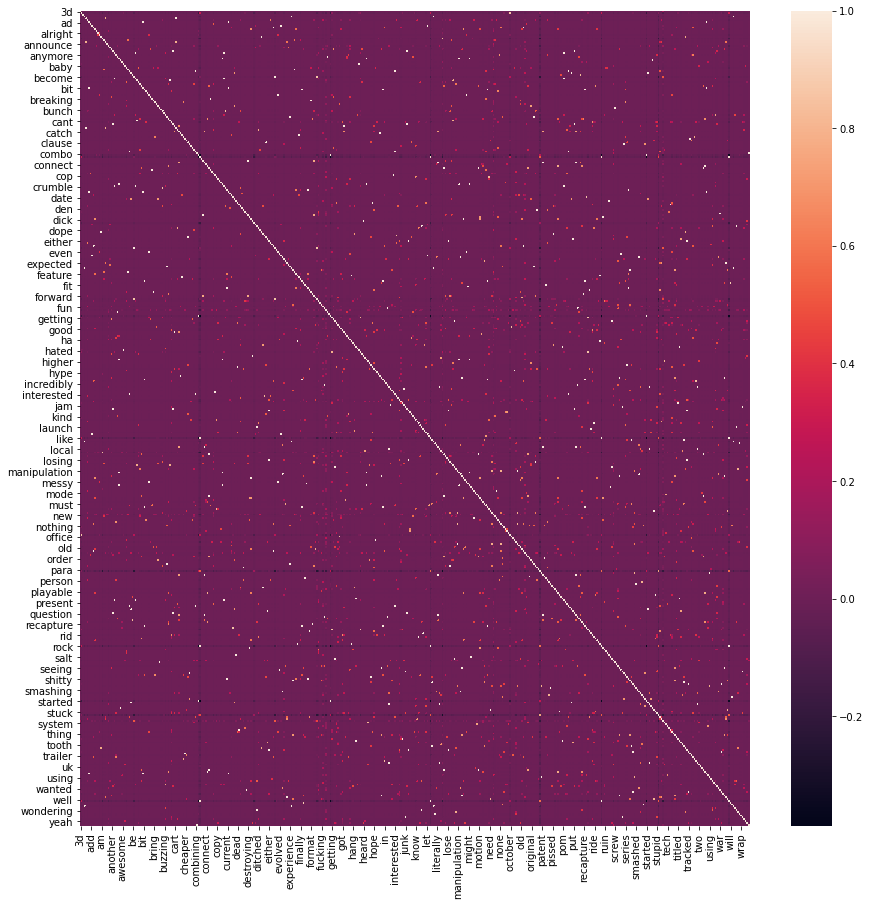

In [32]:
# Get visualization of correlation matrix of smashcounts

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(partyTFIDFcorr)

In [47]:
pa2 = findHighCorr(partyTFIDF)
pa2

level_0      level_1         0
2         5th      october  0.859552
5    absolute  explanation  1.000000
6    absolute       listen  1.000000
7    absolute   witchcraft  1.000000
9      actual         cast  1.000000
..        ...          ...       ...
719      side     watching  1.000000
731   spoiler          win  1.000000
742      stay        tuned  1.000000
748     still         well  0.804002
784   tracked     watching  1.000000

[207 rows x 3 columns]

In [48]:
# Finding overlap
pa1.merge(pa2)

level_0      level_1    0
0    absolute  explanation  1.0
1    absolute       listen  1.0
2    absolute   witchcraft  1.0
3      actual         cast  1.0
4          ad          bit  1.0
..        ...          ...  ...
175      side      tracked  1.0
176      side     watching  1.0
177   spoiler          win  1.0
178      stay        tuned  1.0
179   tracked     watching  1.0

[180 rows x 3 columns]

Slightly more results here actually, with 180 overlapping results.

# Conclusion

Through our exploratory data analysis, we've gained some insight into which tokens are appearing in each of our collection of tweets. This was done with word clouds, and they also tell us the relative frequencies of the most occuring tokens. 

We then extracted features of each collection of tweets using vectorizers, and were able to have a look at correlations between the frequencies of each token. The results of this analysis will be needed when we ultimately analyze the feature importances of our final models.